In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv') # reading data

In [3]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Is Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Number of times pregnant                        768 non-null    int64  
 1   Plasma glucose concentration                    768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                768 non-null    int64  
 3   Triceps skinfold thickness (mm)                 768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                  768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)  768 non-null    float64
 6   Diabetes pedigree function                      768 non-null    float64
 7   Age                                             768 non-null    int64  
 8   Is Diabetic                                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 K

In [6]:
# missing values

data.isna().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

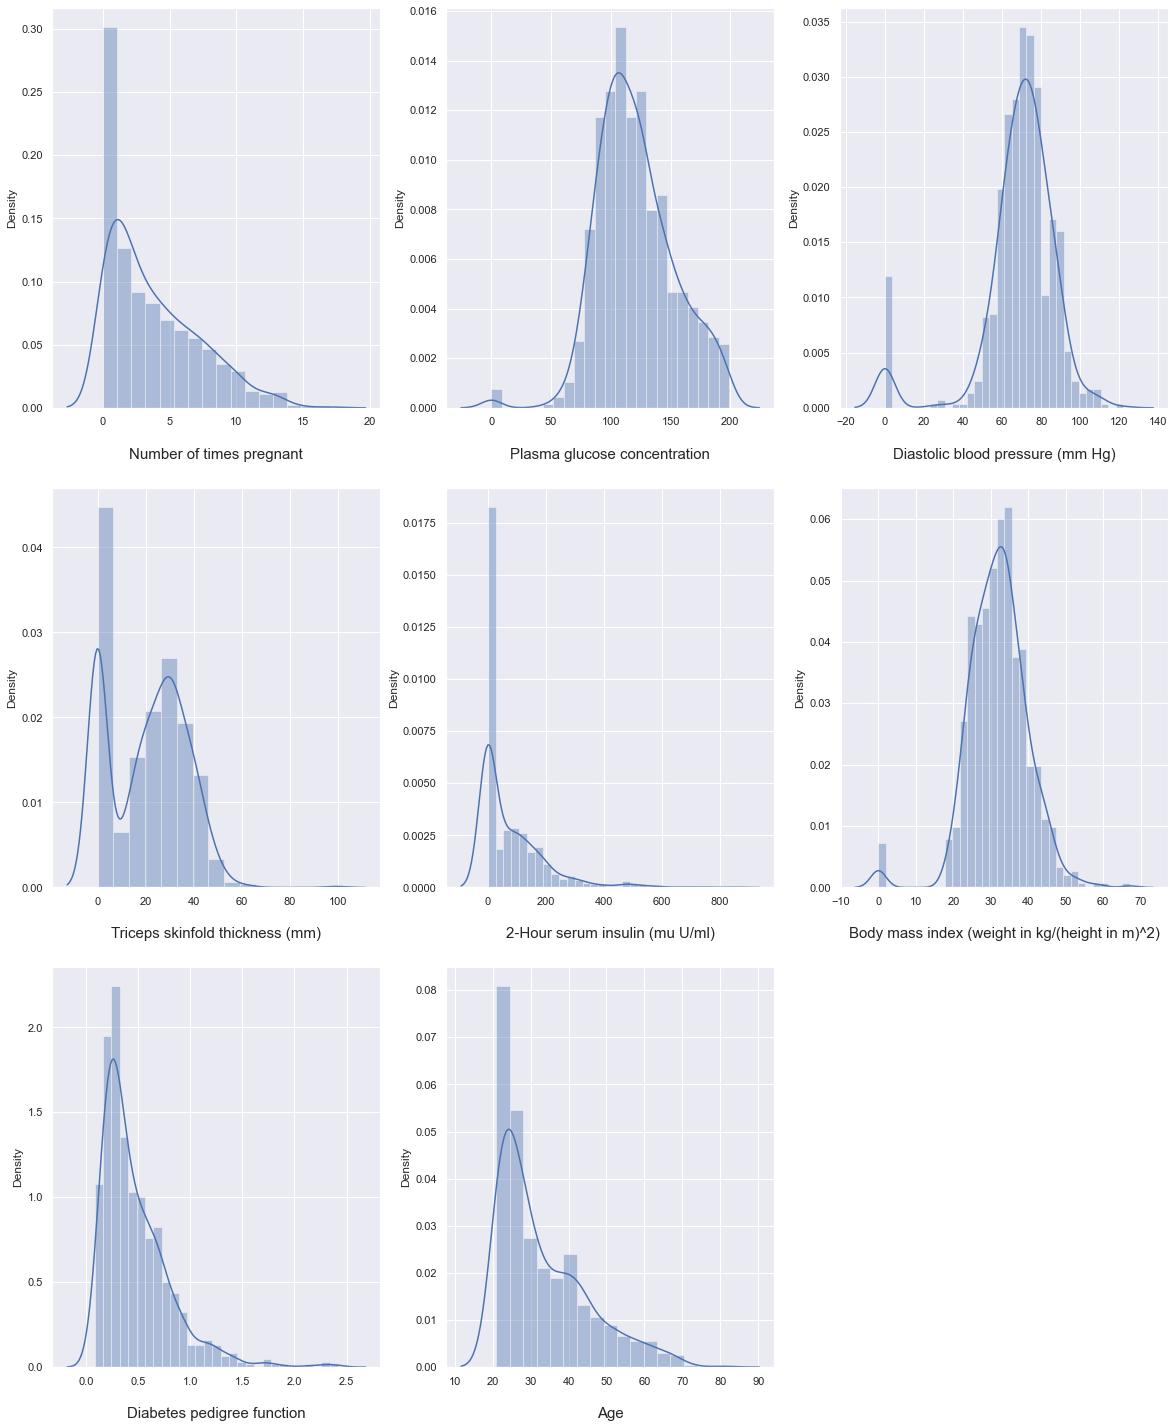

In [7]:
# let's see how data is distributed for every column

plt.figure(figsize = (20, 25))
plotnumber = 1

for col in data:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel('\n' + col, fontsize = 15)
        
        
    plotnumber += 1
    
plt.show()

Many columns contains 0 values which is not acceptable so we will first replace 0 values to nan values and then fill na values with mean or mode of that column.

In [8]:
cols = ['Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)', 'Triceps skinfold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age']

In [9]:
# replacing 0 values with nan

for col in cols:
    data[col] = data[col].replace(0, np.nan)

In [10]:
# checking for missing values

data.isna().sum()

Number of times pregnant                            0
Plasma glucose concentration                        5
Diastolic blood pressure (mm Hg)                   35
Triceps skinfold thickness (mm)                   227
2-Hour serum insulin (mu U/ml)                    374
Body mass index (weight in kg/(height in m)^2)     11
Diabetes pedigree function                          0
Age                                                 0
Is Diabetic                                         0
dtype: int64

In [11]:
# imputing the missing values

data['Plasma glucose concentration'].fillna(data['Plasma glucose concentration'].mean(), inplace = True)
data['Diastolic blood pressure (mm Hg)'].fillna(data['Diastolic blood pressure (mm Hg)'].mean(), inplace = True)
data['Triceps skinfold thickness (mm)'].fillna(data['Triceps skinfold thickness (mm)'].mean(), inplace = True)
data['2-Hour serum insulin (mu U/ml)'].fillna(data['2-Hour serum insulin (mu U/ml)'].mean(), inplace = True)
data['Body mass index (weight in kg/(height in m)^2)'].fillna(data['Body mass index (weight in kg/(height in m)^2)'].mean(), inplace = True)

In [12]:
# checking for missing values after imputation

data.isna().sum()

Number of times pregnant                          0
Plasma glucose concentration                      0
Diastolic blood pressure (mm Hg)                  0
Triceps skinfold thickness (mm)                   0
2-Hour serum insulin (mu U/ml)                    0
Body mass index (weight in kg/(height in m)^2)    0
Diabetes pedigree function                        0
Age                                               0
Is Diabetic                                       0
dtype: int64

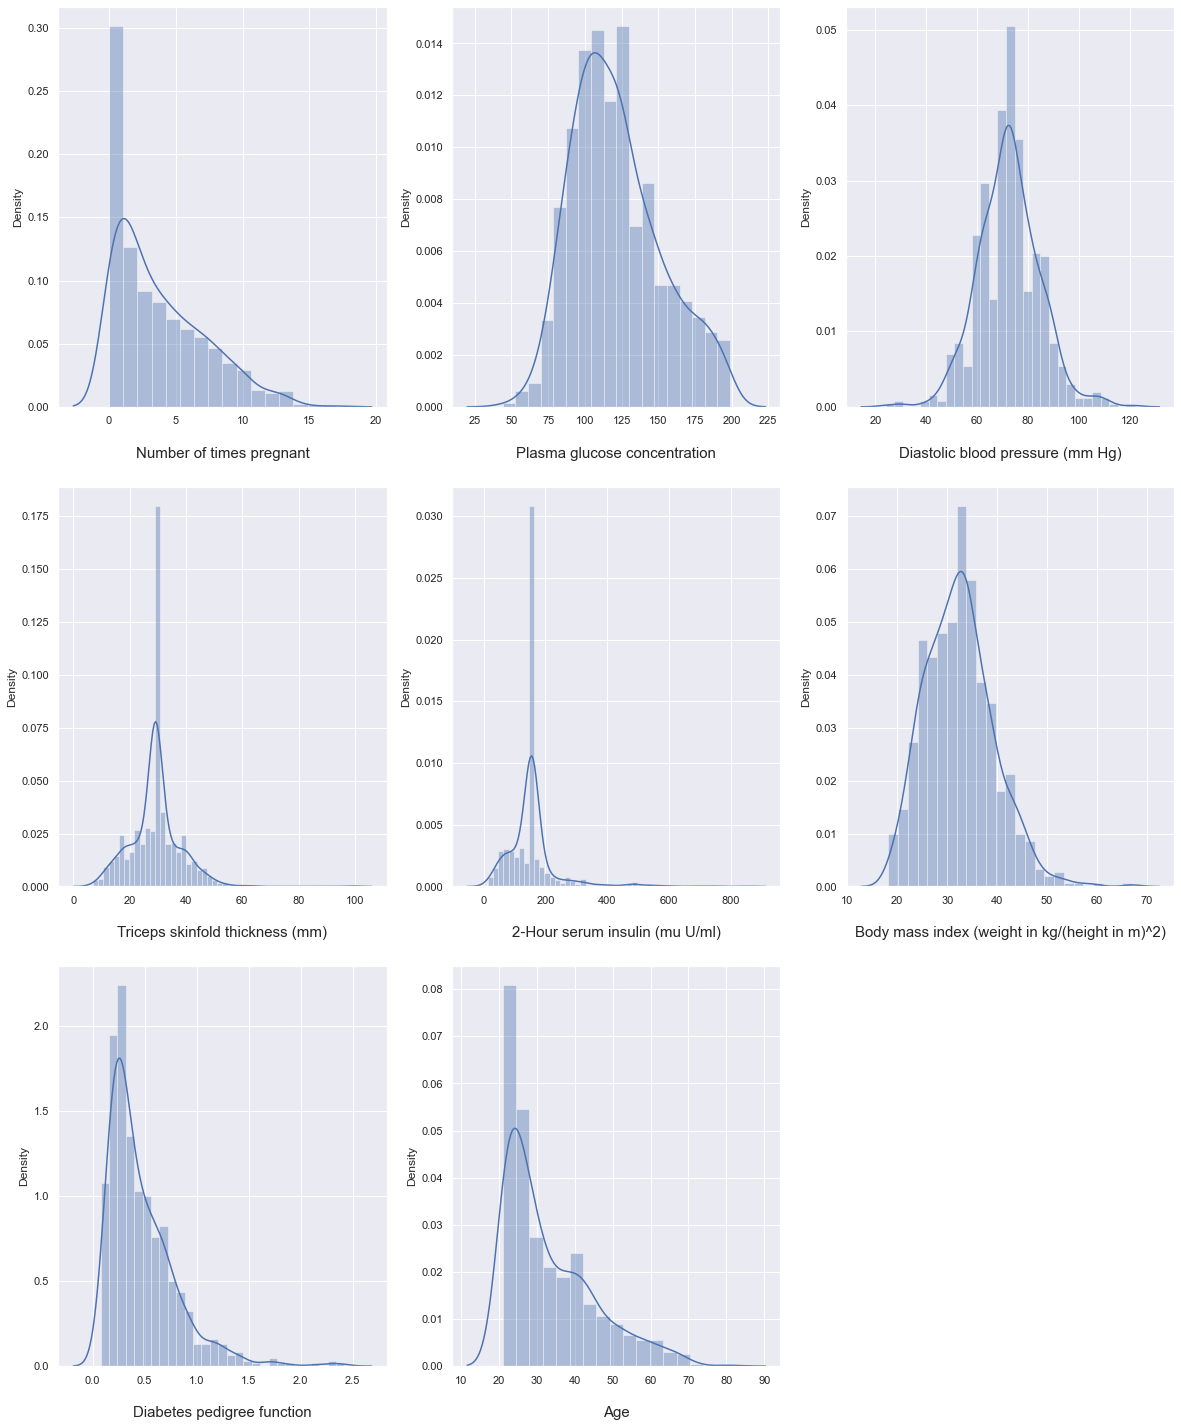

In [13]:
# data distribution

plt.figure(figsize = (20, 25))
plotnumber = 1

for col in data:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel('\n' + col, fontsize = 15)
        
        
    plotnumber += 1
    
plt.show()

Now our data looks much beter, let's look for outliers now.

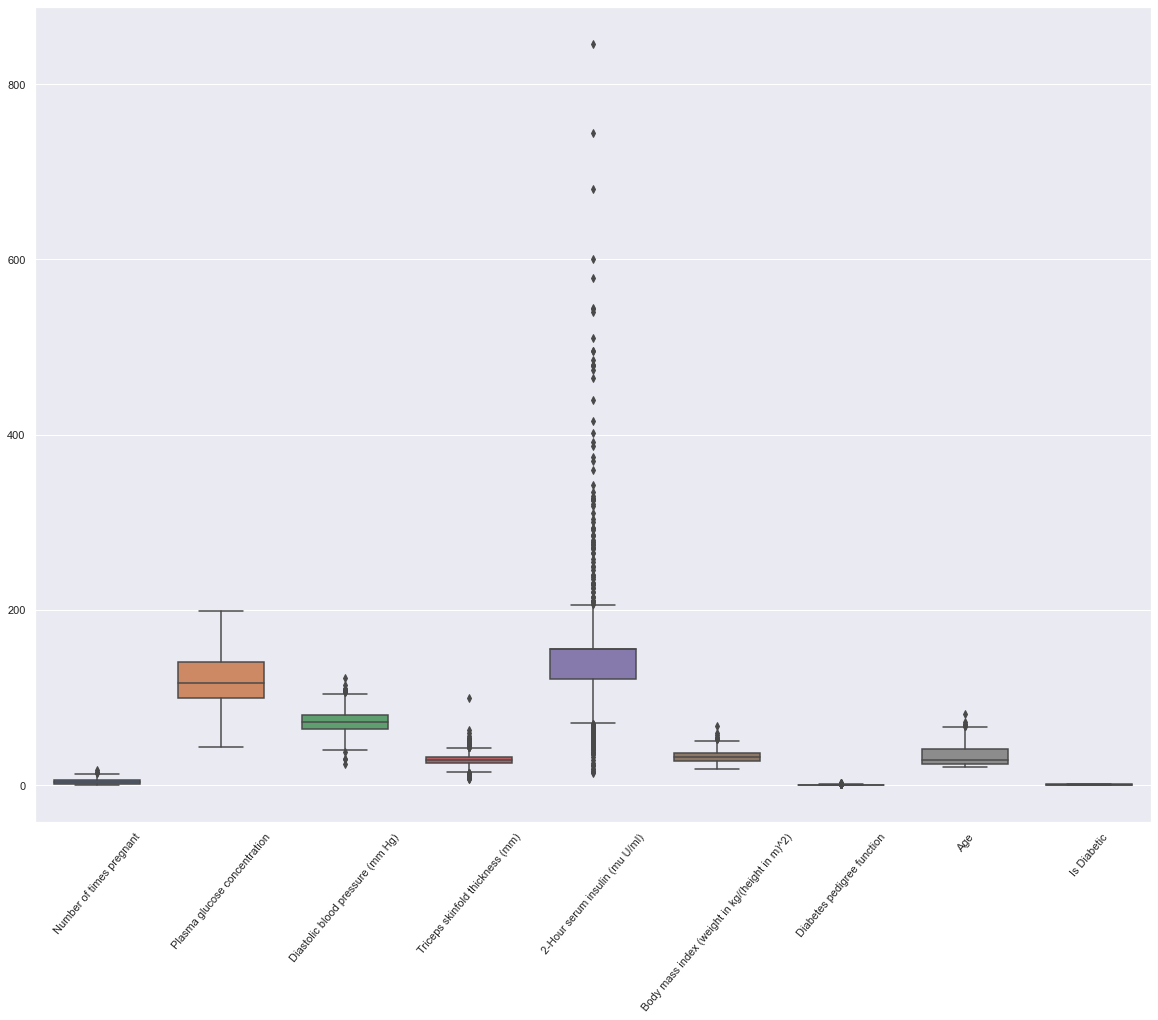

In [14]:
fig, ax = plt.subplots(figsize = (20, 15))

sns.boxplot(data = data, width = 0.7, ax = ax)
plt.xticks(rotation = 50)

plt.show()

Some of the columns have outliers let's handle them.

In [15]:
outlier = data['Diastolic blood pressure (mm Hg)'].quantile(0.99)
# removing the top 1% data from the 'Diastolic blood pressure (mm Hg)'' column
data = data[data['Diastolic blood pressure (mm Hg)'] < outlier]

outlier = data['Triceps skinfold thickness (mm)'].quantile(0.98)
# removing the top 2% data from the 'Triceps skinfold thickness (mm)' column
data = data[data['Triceps skinfold thickness (mm)'] < outlier]

outlier = data['2-Hour serum insulin (mu U/ml)'].quantile(0.94)
# removing the top 6% data from the '2-Hour serum insulin (mu U/ml)' column
data = data[data['2-Hour serum insulin (mu U/ml)'] < outlier]

outlier = data['Body mass index (weight in kg/(height in m)^2)'].quantile(0.99)
# removing the top 1% data from the 'Body mass index (weight in kg/(height in m)^2)' column
data = data[data['Body mass index (weight in kg/(height in m)^2)'] < outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from the 'Age' column
data = data[data['Age'] < outlier]

Let's look at data after removal of outliers.

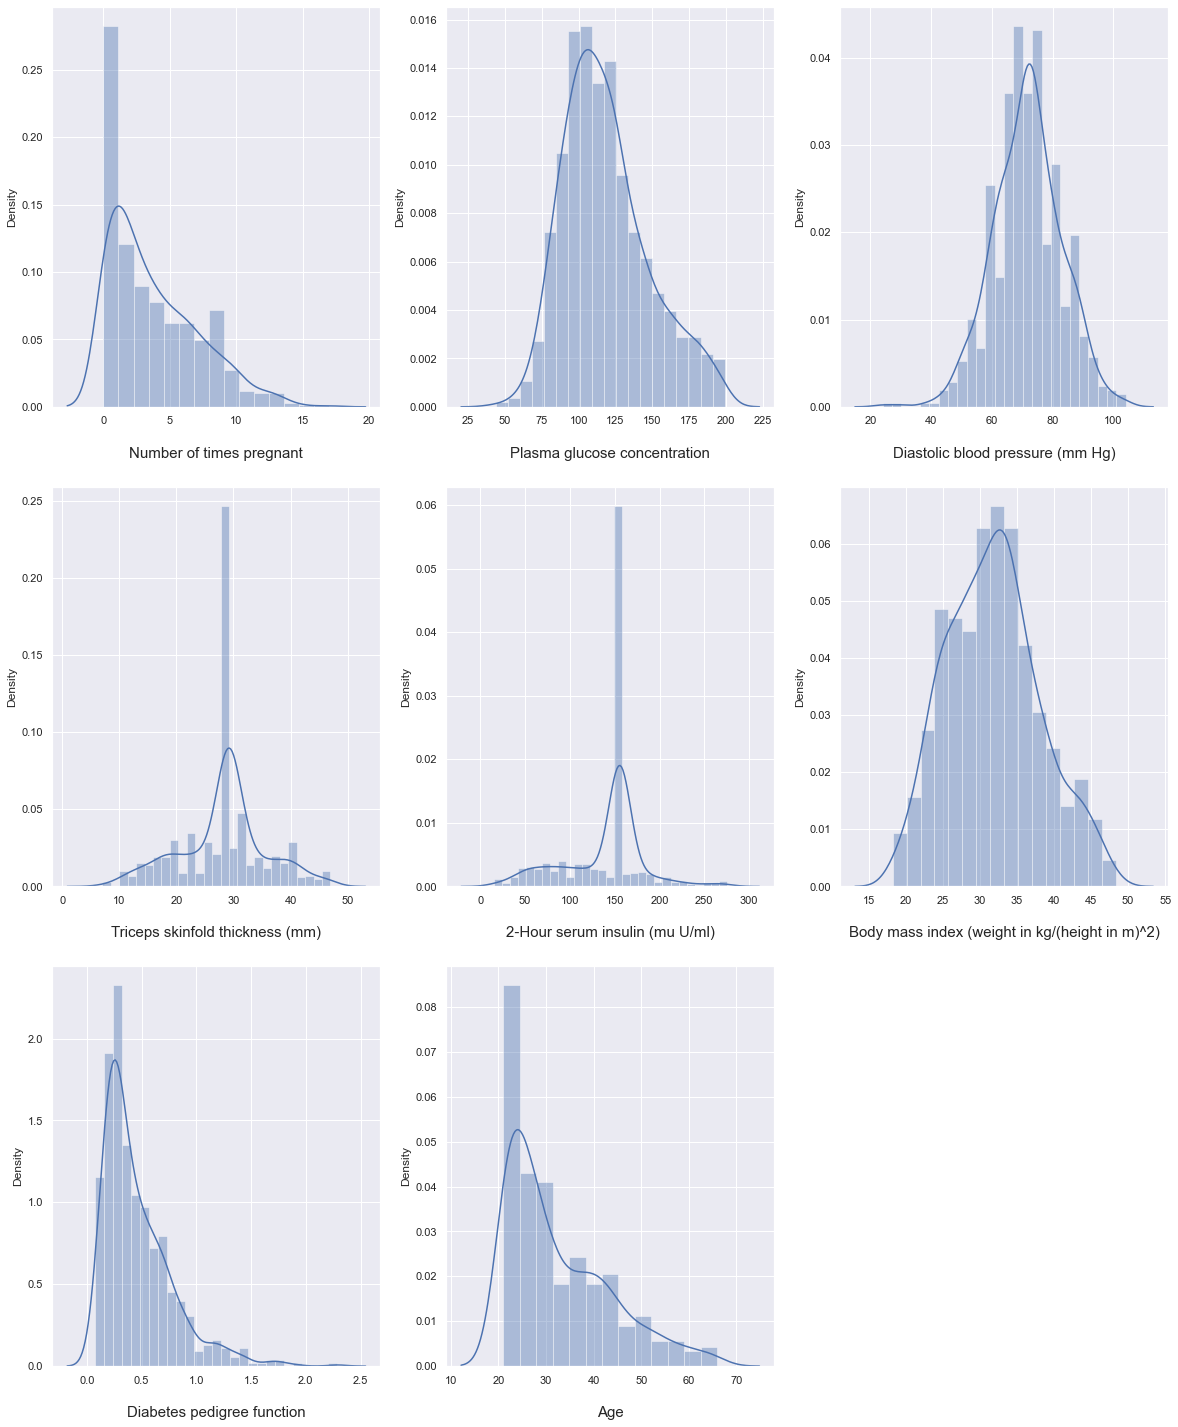

In [16]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in data:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(data[col])
        plt.xlabel('\n' + col, fontsize = 15)
        
        
    plotnumber += 1
    
plt.show()

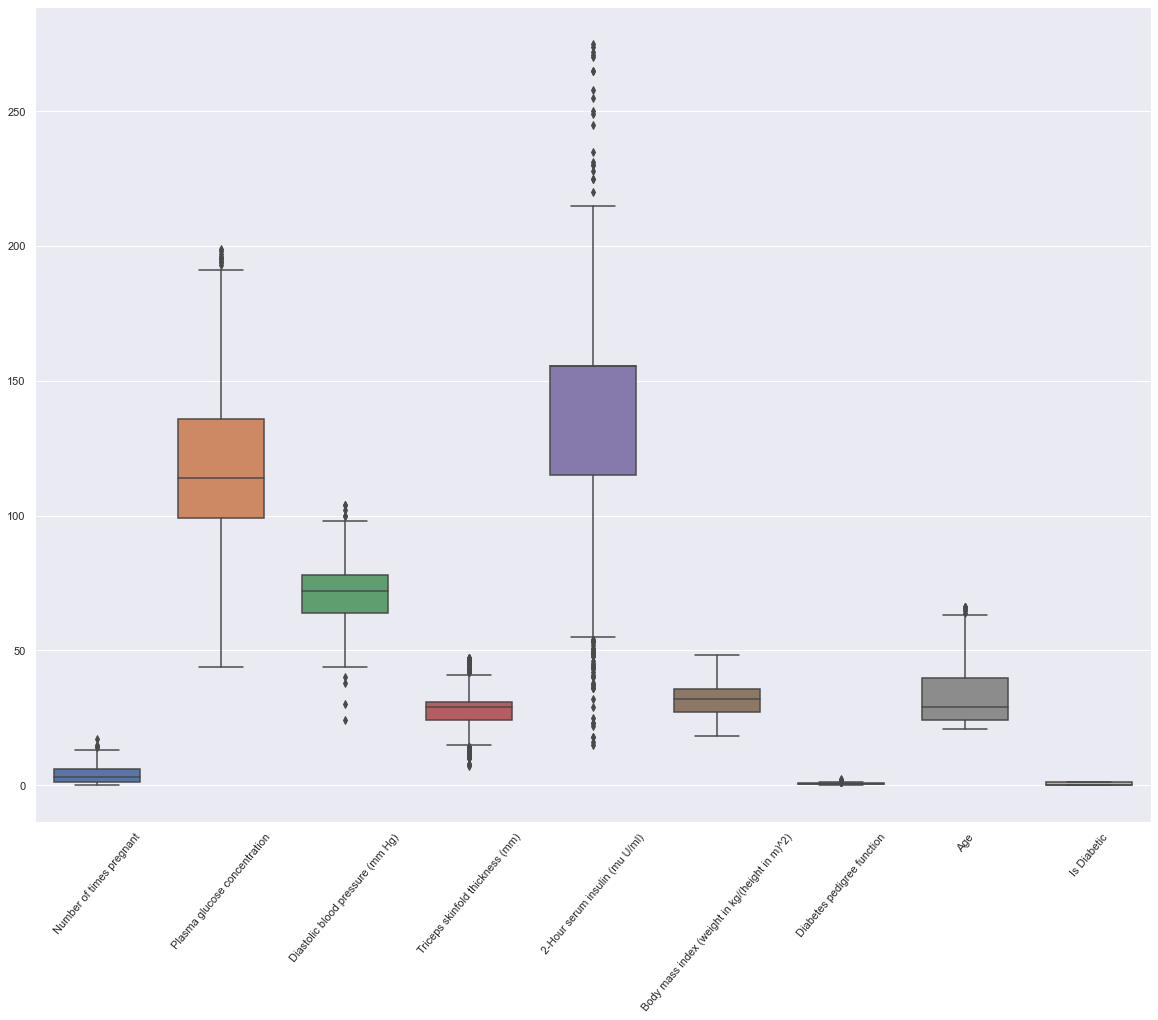

In [17]:
fig, ax = plt.subplots(figsize = (20, 15))

sns.boxplot(data = data, width = 0.7, ax = ax)
plt.xticks(rotation = 50)

plt.show()

Now data looks much more better.

In [18]:
# creating features and label 

X = data.drop(columns = 'Is Diabetic')
y = data['Is Diabetic']

In [19]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# checking for collinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

In [21]:
vif

,VIF,Features
0,1.451480,Number of times pregnant
1,1.259436,Plasma glucose concentration
2,1.223805,Diastolic blood pressure (mm Hg)
3,1.457727,Triceps skinfold thickness (mm)
4,1.198041,2-Hour serum insulin (mu U/ml)
5,1.515458,Body mass index (weight in kg/(height in m)^2)
6,1.036512,Diabetes pedigree function
7,1.674529,Age


Since vif for all columns is less than 5 so there is no multicollinearity present in our data.

In [22]:
# splitting data into training and test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [23]:
# fitting training data to model

from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic')
xgb.fit(X_train, y_train)

[17:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
# prediction

y_pred = xgb.predict(X_test)

In [25]:
# comparing prediction value and actual values

comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comp

,Actual,Predicted
733,0,0
381,0,0
70,1,0
417,1,1
113,0,0
...,...,...
611,1,1
553,0,0
202,0,0
507,0,0


In [26]:
# checking training accuracy

xgb.score(X_train, y_train)

1.0

In [27]:
# checking initial testing accuracy

xgb.score(X_test, y_test)

0.7401960784313726

Now to increase accuracy of model, we'll do hyperparameter tuning using grid search

In [28]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators' : [10, 50, 100, 200],
    'max_depth' : [3, 5, 10, 20],
    'learning_rate' : [1, 0.5, 0.1, 0.01, 0.001],
    'booster' : ['gbtree', 'gblinear', 'dart']
}

In [29]:
grid_search = GridSearchCV(XGBClassifier(objective = 'binary:logistic'), param_grid = grid_params, verbose = 3, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:    6.7s


[17:24:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   39.8s finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [30]:
# best parameters 

grid_search.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 200}

In [31]:
xgb = XGBClassifier(learning_rate = 0.01, max_depth = 5, n_estimators = 200, booster = 'gbtree')
xgb.fit(X_train, y_train)

[17:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# new testing accuracy

new_accuracy = xgb.score(X_test, y_test)
new_accuracy

0.7450980392156863

Accuracy of our model increases a little bit.